In [8]:
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install sklearn

In [9]:
combats_url = 'data/combats.csv'
pokemon_url = 'data/pokemon.csv'
tests_url= 'data/tests.csv'

In [10]:
import pandas as pd
combats = pd.read_csv(combats_url)
combats.head(3)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668


In [11]:

tests = pd.read_csv(tests_url)
tests.head(3)

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115


In [20]:
pokemon = pd.read_csv(pokemon_url)
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [14]:
pokemon_kor_name_url='data/pokemon_kor_name.csv'

pokemon_kor_name = pd.read_csv(pokemon_kor_name_url)
pokemon_kor_name.set_index('#', inplace=True)
pokemon_kor_name.head()

,Name,Kor_name
#,,
1.0,Bulbasaur,이상해씨
2.0,Ivysaur,이상해풀
3.0,Venusaur,이상해꽃
4.0,Charmander,파이리
5.0,Charmeleon,리자드


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]

In [ ]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head(3)

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem


count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


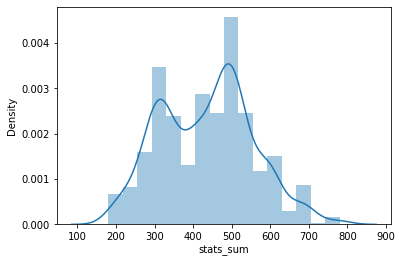

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
print(pokemon["stats_sum"].describe())
sns.distplot(pokemon["stats_sum"])
plt.show()

count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64


C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


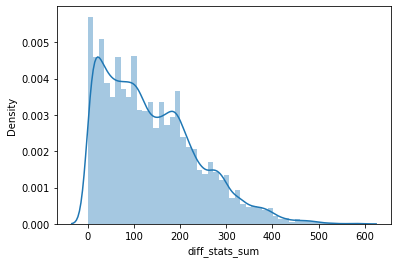

In [ ]:
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
combats_stats_sum = combats[cols].replace(stats_sum_dict)
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

count    50000.000000
mean        79.776320
std        150.093351
min       -562.000000
25%        -20.000000
50%         80.000000
75%        186.000000
max        590.000000
dtype: float64


C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


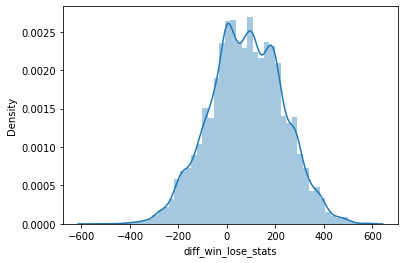

In [ ]:
combats_stats_sum["Loser"] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)
diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]
print(diff_win_lose_stats.describe())
sns.distplot(diff_win_lose_stats)
plt.xlabel("diff_win_lose_stats")
plt.show()

In [ ]:
stats_sum_dict_re = dict(zip(pokemon['stats_sum'], pokemon['#']))
combats_stats_sum["diff"] = diff_win_lose_stats
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
print ("Surpassing one's superiors Battle number : " + str(len(surpassing_stats_sum)))
surpassing_id = surpassing_stats_sum[cols].replace(stats_sum_dict_re)
surpassing_name = surpassing_id[cols].replace(names_dict)
surpassing_name.join(combats_stats_sum["diff"]).head(8)

Surpassing one's superiors Battle number : 5716


,First_pokemon,Second_pokemon,Winner,diff
5,Joltik,Aegislash Shield Forme,Joltik,-201
36,Pancham,Whismur,Whismur,-108
37,Clauncher,Dusclops,Clauncher,-125
42,Goomy,Bouffalant,Goomy,-190
51,Mega Rayquaza,Aegislash Shield Forme,Aegislash Shield Forme,-260
158,Bouffalant,Vullaby,Vullaby,-120
168,Keldeo Resolute Forme,Arbok,Arbok,-142
174,Gothorita,Volcanion,Gothorita,-210


In [ ]:
surpassing_name.join(combats_stats_sum["diff"]).sort_values(by="diff").head(4)

,First_pokemon,Second_pokemon,Winner,diff
5861,Mega Rayquaza,Cleffa,Cleffa,-562
2480,Mega Rayquaza,Cleffa,Cleffa,-562
41824,Shedinja,Mega Rayquaza,Shedinja,-544
3506,Mega Rayquaza,Inkay,Inkay,-492


C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


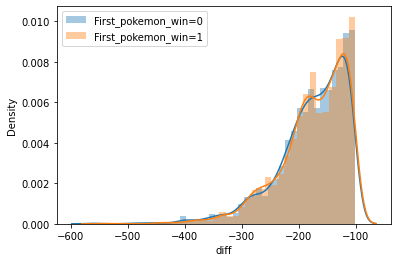

In [ ]:
combats_stats_sum["First_Win"] =  combats_stats_sum.apply(lambda x: 1 if x["First_pokemon"] ==  x["Winner"] else 0, axis = 1)
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==0]["diff"], label="First_pokemon_win=0")
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==1]["diff"], label="First_pokemon_win=1")
plt.legend()
plt.show()

C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-First_Win=0-
count    26065.000000
mean        76.155764
std        152.292707
min       -562.000000
25%        -27.000000
50%         79.000000
75%        185.000000
max        585.000000
Name: diff, dtype: float64
-First_Win=1-
count    23935.000000
mean        83.719072
std        147.563182
min       -544.000000
25%        -13.000000
50%         82.000000
75%        190.000000
max        590.000000
Name: diff, dtype: float64


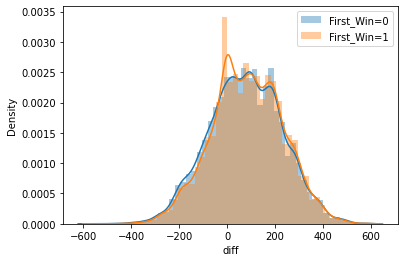

In [ ]:
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"], label="First_Win=0")
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"], label="First_Win=1")
print ("-First_Win=0-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"].describe())
print ("-First_Win=1-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"].describe())
plt.legend()
plt.show()

In [ ]:
print ("There are {} Types.".format(len(pokemon["Type 1"].drop_duplicates())))
list(pokemon["Type 1"].drop_duplicates())

There are 18 Types.


['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [ ]:
type_cols = ["Type 1", "Type 2"]
print ("There are {} unique type-combinations.".format(len(pokemon[type_cols].drop_duplicates())))

There are 154 unique type-combinations.


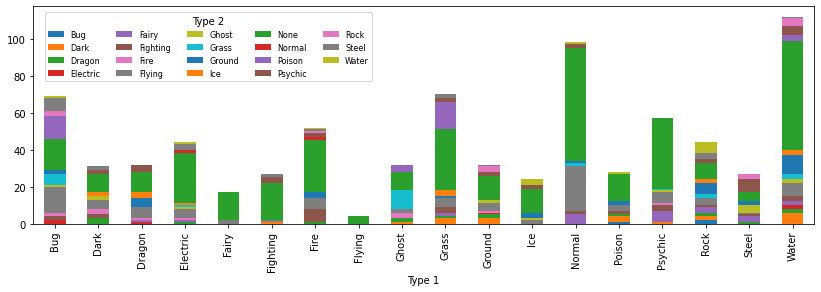

In [ ]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")
type_cross = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Type 2")
plt.show()

In [ ]:
Normal = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Fighting = {"Normal": 2, "Fighting": 1, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 0, "Steel": 2, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 0.5, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Poison = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 0.5, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0.5, "Steel": 0, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 2}
Ground = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 1, "Flying": 0, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 2, "Fire": 2, "Water": 1, "Electric": 2, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Flying = {"Normal": 1, "Fighting": 2, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 0.5, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Bug = {"Normal": 1, "Fighting": 0.5, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 1, "Rock": 1, "Ghost": 0.5, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Rock = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 0.5, "Flying": 2, "Bug": 2, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 2, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Ghost = {"Normal": 0, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 1}
Steel = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 0.5, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 0.5}
Fire = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 2, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 2, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Water = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 1, "Fire": 2, "Water": 0.5, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Electric = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 0, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 1, "Fire": 1, "Water": 2, "Electric": 0.5, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Grass = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 2, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 2, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Ice = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 0.5, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 1}
Psychic = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 0.5, "Dragon": 1, "Dark": 0, "Fairy": 1}
Dragon = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 0}
Dark = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 0.5}
Fairy = {"Normal": 1, "Fighting": 2, "Poison": 0.5, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 2, "Fairy": 1}

type_relation = {"Normal": Normal, "Fighting": Fighting, "Poison": Poison, "Ground": Ground, "Flying": Flying, "Bug": Bug, "Rock": Rock, "Ghost": Ghost, "Steel": Steel, "Fire": Fire, "Water": Water, "Electric": Electric, "Grass": Grass, "Ice": Ice, "Psychic": Psychic, "Dragon": Dragon, "Dark": Dark, "Fairy": Fairy}
df_type_relation = pd.DataFrame(type_relation)
print ("Row is Diffender, Column is Attacker")
df_type_relation

Row is Diffender, Column is Attacker


,Normal,Fighting,Poison,Ground,Flying,Bug,Rock,Ghost,Steel,Fire,Water,Electric,Grass,Ice,Psychic,Dragon,Dark,Fairy
Normal,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fighting,1.0,1.0,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0
Poison,1.0,0.5,0.5,2.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,0.5
Ground,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0
Flying,1.0,0.5,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,2.0,0.5,2.0,1.0,1.0,1.0,1.0
Bug,1.0,0.5,1.0,0.5,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0
Rock,0.5,2.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
Ghost,0.0,0.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Steel,0.5,2.0,0.0,2.0,0.5,0.5,0.5,1.0,0.5,2.0,1.0,1.0,0.5,0.5,0.5,0.5,1.0,0.5
Fire,1.0,1.0,1.0,2.0,1.0,0.5,2.0,1.0,0.5,0.5,2.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5


count    50000.000000
mean         1.146062
std          0.869392
min          0.031250
25%          0.500000
50%          1.000000
75%          1.000000
max         16.000000
Name: Relation, dtype: float64


C:\Users\Yeonsik Kim\anaconda3\envs\sec3_pro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


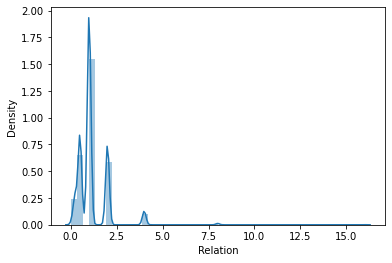

In [ ]:
pokemon["Type"] = pokemon.apply(lambda x: x["Type 1"]+"/"+x["Type 2"], axis=1)
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
combats_type = combats[cols].replace(type_dict)
combats_type["Loser"] = combats_type.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)

zero_dict = {0: 0.25}
df_type_relation = df_type_relation[:].replace(zero_dict)

def calcRelation(combats_type):
    r0 = 1
    win_type1 = combats_type["Winner"].split("/")[0]
    win_type2 = combats_type["Winner"].split("/")[1]
    lose_type1 = combats_type["Loser"].split("/")[0]
    lose_type2 = combats_type["Loser"].split("/")[1]
    if win_type2 != "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r3 = df_type_relation[win_type2][lose_type1]
        r4 = df_type_relation[win_type2][lose_type2]
        r = r0 * r1 * r2 * r3 * r4
    elif win_type2 != "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r3 = df_type_relation[win_type2][lose_type1]
        r = r0 * r1 * r3
    elif win_type2 == "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r = r0 * r1 * r2
    elif win_type2 == "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r = r0 * r1
    return r

combats_type["Relation"] = combats_type.apply(lambda x: calcRelation(x), axis = 1)
print (combats_type["Relation"].describe())
sns.distplot(combats_type["Relation"])
plt.show()

In [ ]:

combats_names = combats[cols].replace(names_dict)
print (combats_names["Winner"].value_counts()[:10])
winners = list(combats_names["Winner"])
winners_str = [str(i) for i in winners]
winners_text = (",").join(winners_str)

Mewtwo                152
Infernape             136
Aerodactyl            136
Jirachi               134
Slaking               133
Deoxys Speed Forme    133
Mega Absol            130
Murkrow               130
Mega Houndoom         128
Mega Rayquaza         127
Name: Winner, dtype: int64


In [ ]:
first_num = combats_names["First_pokemon"].value_counts()
second_num = combats_names["Second_pokemon"].value_counts()
battle_num = first_num + second_num
battle_win = pd.DataFrame({"battle": battle_num, "win": combats_names["Winner"].value_counts()}, columns=["battle", "win"])
battle_win["ratio"] = battle_win["win"]/battle_win["battle"]
battle_win.sort_values(by=["ratio"], ascending=False).head(10)

,battle,win,ratio
Mega Aerodactyl,129,127.0,0.984496
Weavile,119,116.0,0.974790
Tornadus Therian Forme,125,121.0,0.968000
Mega Beedrill,119,115.0,0.966387
Aerodactyl,141,136.0,0.964539
Mega Lopunny,129,124.0,0.961240
Greninja,127,122.0,0.960630
Meloetta Pirouette Forme,123,118.0,0.959350
Mega Mewtwo Y,125,119.0,0.952000
Mega Sharpedo,120,114.0,0.950000


In [ ]:
battle_win.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, Abomasnow to Zygarde Half Forme
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   battle  783 non-null    int64  
 1   win     782 non-null    float64
 2   ratio   782 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 24.5+ KB


In [ ]:
battle_win[battle_win["win"].isnull()]

,battle,win,ratio
Shuckle,135,NaN,NaN


In [ ]:
battle_win.loc["Shuckle", ["win", "ratio"]] = 0
battle_win[battle_win.index=="Shuckle"]

,battle,win,ratio
Shuckle,135,0.0,0.0


In [ ]:
id_dict = dict(zip(pokemon['Name'], pokemon['#']))
battle_win["Name"] = battle_win.index
battle_win["#"] = battle_win["Name"].replace(id_dict)
ratio_dict = dict(zip(battle_win['#'], battle_win['ratio']))
pokemon["ratio"] = pokemon["#"].replace(ratio_dict)
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum,Type,ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,Grass/Poison,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,Grass/Poison,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,Grass/Poison,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,Grass/Poison,0.560000
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,309,Fire/None,0.491071


In [ ]:
nobattle_pokemon = pokemon[pokemon["ratio"]>1]
print ("There are {} pokemons have NaN ratio.".format(len(nobattle_pokemon.index)))
nobattle_pokemon[["#", "Name", "ratio"]]

There are 17 pokemons have NaN ratio.


,#,Name,ratio
11,12,Blastoise,12.0
32,33,Sandshrew,33.0
45,46,Wigglytuff,46.0
62,63,NaN,63.0
65,66,Poliwag,66.0
77,78,Victreebel,78.0
89,90,Magneton,90.0
143,144,Ditto,144.0
182,183,Ariados,183.0
235,236,Ursaring,236.0


In [ ]:
pokemon.loc[62, "Name"] = "Primeape"
pokemon[pokemon["Name"]=="Primeape"][["#", "Name", "ratio"]]

,#,Name,ratio
62,63,Primeape,63.0


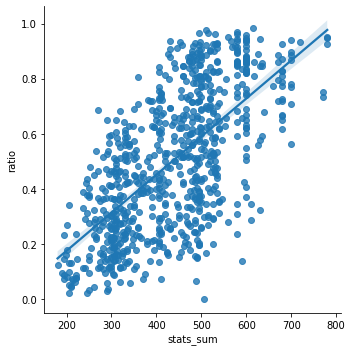

In [ ]:
battle_pokemon = pokemon[pokemon["ratio"] <= 1]
sns.lmplot(x="stats_sum", y="ratio", data=battle_pokemon)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(battle_pokemon["stats_sum"].values.reshape(-1, 1), battle_pokemon["ratio"].values.reshape(-1, 1))
nobattle_pokemon["ratio"] = linreg.predict(nobattle_pokemon["stats_sum"].values.reshape(-1, 1))
nobattle_pokemon[["#", "Name", "ratio"]]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16876\3345499972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobattle_pokemon["ratio"] = linreg.predict(nobattle_pokemon["stats_sum"].values.reshape(-1, 1))


,#,Name,ratio
11,12,Blastoise,0.631706
32,33,Sandshrew,0.314318
45,46,Wigglytuff,0.500611
62,63,NaN,0.528210
65,66,Poliwag,0.314318
77,78,Victreebel,0.576508
89,90,Magneton,0.542009
143,144,Ditto,0.297758
182,183,Ariados,0.438513
235,236,Ursaring,0.590307


In [ ]:
combats_add_data = combats.copy()
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
hp_dict = dict(zip(pokemon['#'], pokemon['HP']))
attack_dict = dict(zip(pokemon['#'], pokemon['Attack']))
defense_dict = dict(zip(pokemon['#'], pokemon['Defense']))
spattack_dict = dict(zip(pokemon['#'], pokemon['Sp. Atk']))
spdefense_dict = dict(zip(pokemon['#'], pokemon['Sp. Def']))
speed_dict = dict(zip(pokemon['#'], pokemon['Speed']))
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
ratio_dict = dict(zip(pokemon['#'], pokemon['ratio']))
combats_add_data["First_pokemon_type"] = combats_add_data["First_pokemon"].replace(type_dict)
combats_add_data["First_pokemon_hp"] = combats_add_data["First_pokemon"].replace(hp_dict)
combats_add_data["First_pokemon_attack"] = combats_add_data["First_pokemon"].replace(attack_dict)
combats_add_data["First_pokemon_defense"] = combats_add_data["First_pokemon"].replace(defense_dict)
combats_add_data["First_pokemon_spattack"] = combats_add_data["First_pokemon"].replace(spattack_dict)
combats_add_data["First_pokemon_spdefense"] = combats_add_data["First_pokemon"].replace(spdefense_dict)
combats_add_data["First_pokemon_speed"] = combats_add_data["First_pokemon"].replace(speed_dict)
combats_add_data["First_pokemon_stats"] = combats_add_data["First_pokemon"].replace(stats_sum_dict)
combats_add_data["First_pokemon_ratio"] = combats_add_data["First_pokemon"].replace(ratio_dict)
combats_add_data["Second_pokemon_type"] = combats_add_data["Second_pokemon"].replace(type_dict)
combats_add_data["Second_pokemon_hp"] = combats_add_data["Second_pokemon"].replace(hp_dict)
combats_add_data["Second_pokemon_attack"] = combats_add_data["Second_pokemon"].replace(attack_dict)
combats_add_data["Second_pokemon_defense"] = combats_add_data["Second_pokemon"].replace(defense_dict)
combats_add_data["Second_pokemon_spattack"] = combats_add_data["Second_pokemon"].replace(spattack_dict)
combats_add_data["Second_pokemon_spdefense"] = combats_add_data["Second_pokemon"].replace(spdefense_dict)
combats_add_data["Second_pokemon_speed"] = combats_add_data["Second_pokemon"].replace(speed_dict)
combats_add_data["Second_pokemon_stats"] = combats_add_data["Second_pokemon"].replace(stats_sum_dict)
combats_add_data["Second_pokemon_ratio"] = combats_add_data["Second_pokemon"].replace(ratio_dict)


def calcTypeRelation(combats_add_data):
    r0 = 1
    first_type1 = combats_add_data["First_pokemon_type"].split("/")[0]
    first_type2 = combats_add_data["First_pokemon_type"].split("/")[1]
    second_type1 = combats_add_data["Second_pokemon_type"].split("/")[0]
    second_type2 = combats_add_data["Second_pokemon_type"].split("/")[1]
    if first_type2 != "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r3 = df_type_relation[first_type2][second_type1]
        r4 = df_type_relation[first_type2][second_type2]
        r = r0 * r1 * r2 * r3 * r4
    elif first_type2 != "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r3 = df_type_relation[first_type2][second_type1]
        r = r0 * r1 * r3
    elif first_type2 == "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r = r0 * r1 * r2
    elif first_type2 == "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r = r0 * r1
    return r

combats_add_data["Relation"] = combats_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)
combats_add_data["First_win"] = combats_add_data.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)
noneed_cols = ["First_pokemon", "Second_pokemon", "Winner", "First_pokemon_type", "Second_pokemon_type"]
combats_add_data = combats_add_data.drop(noneed_cols, axis=1)
combats_add_data.head()

,First_pokemon_hp,First_pokemon_attack,First_pokemon_defense,First_pokemon_spattack,First_pokemon_spdefense,First_pokemon_speed,First_pokemon_stats,First_pokemon_ratio,Second_pokemon_hp,Second_pokemon_attack,Second_pokemon_defense,Second_pokemon_spattack,Second_pokemon_spdefense,Second_pokemon_speed,Second_pokemon_stats,Second_pokemon_ratio,Relation,First_win
0,50,64,50,45,50,41,300,0.227273,70,70,40,60,40,60,340,0.424779,0.5,0
1,91,90,72,90,129,108,580,0.896000,91,129,90,72,90,108,580,0.853659,4.0,0
2,55,40,85,80,105,40,405,0.236220,75,75,75,125,95,40,485,0.156716,1.0,0
3,40,40,40,70,40,20,250,0.032520,77,120,90,60,90,48,485,0.278571,0.5,0
4,70,60,125,115,70,55,495,0.355072,20,10,230,10,230,5,505,0.000000,4.0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = combats_add_data.drop("First_win", axis=1)
y = combats_add_data["First_win"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
print("X_train.shape = " + str(X_train.shape))
print("X_test.shape = " + str(X_test.shape))
print("y_train.shape = " + str(y_train.shape))
print("y_test.shape = " + str(y_test.shape))

X_train.shape = (40000, 17)
X_test.shape = (10000, 17)
y_train.shape = (40000,)
y_test.shape = (10000,)


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
acc_random_forest =random_forest.score(X_test, y_test)
acc_random_forest

0.95

In [ ]:
effective = pd.DataFrame()
effective["feature_name"] = X.columns.tolist()
effective["feature_importance"] = random_forest.feature_importances_
effective.sort_values("feature_importance",ascending=False)

,feature_name,feature_importance
5,First_pokemon_speed,0.196230
13,Second_pokemon_speed,0.185010
7,First_pokemon_ratio,0.171972
15,Second_pokemon_ratio,0.167433
6,First_pokemon_stats,0.033371
14,Second_pokemon_stats,0.032559
1,First_pokemon_attack,0.028722
9,Second_pokemon_attack,0.026721
16,Relation,0.021802
11,Second_pokemon_spattack,0.019347


In [ ]:
def who_is_winner(first_pokmon,second_pokeon):
    tmp=pd.DataFrame({'First_pokemon': [first_pokmon],
                    'Second_pokemon': [second_pokeon]
                            })
    tests_add_data = tmp

    tests_add_data["First_pokemon_type"] = tests_add_data["First_pokemon"].replace(type_dict)
    tests_add_data["First_pokemon_hp"] = tests_add_data["First_pokemon"].replace(hp_dict)
    tests_add_data["First_pokemon_attack"] = tests_add_data["First_pokemon"].replace(attack_dict)
    tests_add_data["First_pokemon_defense"] = tests_add_data["First_pokemon"].replace(defense_dict)
    tests_add_data["First_pokemon_spattack"] = tests_add_data["First_pokemon"].replace(spattack_dict)
    tests_add_data["First_pokemon_spdefense"] = tests_add_data["First_pokemon"].replace(spdefense_dict)
    tests_add_data["First_pokemon_speed"] = tests_add_data["First_pokemon"].replace(speed_dict)
    tests_add_data["First_pokemon_stats"] = tests_add_data["First_pokemon"].replace(stats_sum_dict)
    tests_add_data["First_pokemon_ratio"] = tests_add_data["First_pokemon"].replace(ratio_dict)

    tests_add_data["Second_pokemon_type"] = tests_add_data["Second_pokemon"].replace(type_dict)
    tests_add_data["Second_pokemon_hp"] = tests_add_data["Second_pokemon"].replace(hp_dict)
    tests_add_data["Second_pokemon_attack"] = tests_add_data["Second_pokemon"].replace(attack_dict)
    tests_add_data["Second_pokemon_defense"] = tests_add_data["Second_pokemon"].replace(defense_dict)
    tests_add_data["Second_pokemon_spattack"] = tests_add_data["Second_pokemon"].replace(spattack_dict)
    tests_add_data["Second_pokemon_spdefense"] = tests_add_data["Second_pokemon"].replace(spdefense_dict)
    tests_add_data["Second_pokemon_speed"] = tests_add_data["Second_pokemon"].replace(speed_dict)
    tests_add_data["Second_pokemon_stats"] = tests_add_data["Second_pokemon"].replace(stats_sum_dict)
    tests_add_data["Second_pokemon_ratio"] = tests_add_data["Second_pokemon"].replace(ratio_dict)

    tests_add_data["Relation"] = tests_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)

    noneed_cols = ["First_pokemon", "Second_pokemon", "First_pokemon_type", "Second_pokemon_type"]

    tests_add_data = tests_add_data.drop(noneed_cols, axis=1)

    y_predict = random_forest.predict(tests_add_data)

    data = {"First_pokemon": tmp["First_pokemon"], "Second_pokemon": tmp["Second_pokemon"], "First_win": y_predict}

    submission = pd.DataFrame(data=data, columns=["First_pokemon", "Second_pokemon", "First_win"])

    winner = pd.DataFrame(submission.apply(lambda x: x["First_pokemon"] if x["First_win"]==1 else x["Second_pokemon"], axis=1), columns=["Winner"])

    submission = pd.concat([submission, winner], axis=1)

    submission = submission.drop(["First_win"], axis=1)

    submission['Winner'][0]

    win_poke = pokemon_kor_name[pokemon_kor_name.index == submission['Winner'][0]] 
  
    win_poke_kor = win_poke['Kor_name']

    return win_poke_kor

In [ ]:
who_is_winner(164,15)


#
164.0    야부엉
Name: Kor_name, dtype: object

In [ ]:
who_is_winner(3,1)


#
3.0    이상해꽃
Name: Kor_name, dtype: object